In [140]:
import torch
import torch.nn as nn
from torchvision import models, transforms

class_index = ['あいおいニッセイ同和損保フェニックスタワー',
               'ブリーゼタワー',
               'シティタワー西梅田',
               'グランフロント大阪 南館 タワーA',
               '梅田阪急ビル オフィスタワー',
               'ヒルトン大阪（吉本ビルディング）',
               '明治安田生命大阪梅田ビル',
               '大阪モード学園',
               'ノースゲートビルディング',
               'グランフロント大阪オーナーズタワー',
               '梅田スカイビル',
               'ヨドバシ梅田タワー']

In [141]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)

net.classifier[6] = nn.Linear(in_features=4096, out_features=len(class_index))
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [142]:
device = torch.device('cpu')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.batchmark = False
net.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [143]:
load_path = './weights_fine_tuning.pth'
load_weights = torch.load(load_path)
#net.load_state_dict(load_weights)

#model = MultiClassifier()
net.load_state_dict(torch.load(load_path, map_location='cpu'))
net.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [144]:
from PIL import Image
image_path = './data/images.jpg'
img = Image.open(image_path)

In [145]:
class BaseTransform():
    def __init__(self, size, mean, std):
        
        self.base_transform = {
            'train':
                transforms.Compose([
                transforms.RandomResizedCrop(size, scale=(0.5,1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
                ]),
            'val':
                transforms.Compose([
                transforms.Resize(size),
                transforms.CenterCrop(size),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
                ])
        }
        
    def __call__(self, img, phase='train'):
        return self.base_transform[phase](img)
    
size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

In [146]:
class Predictor():
    
    def __init__(self):
        self.class_index = class_index
        
    def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predict_label_name = self.class_index[maxid]
        
        return predict_label_name

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


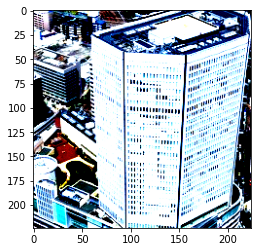

このビルは「ノースゲートビルディング」です


In [151]:
import numpy as np
image_path = './data/images2.jpg'
img = Image.open(image_path)

transform = BaseTransform(size, mean, std)
img_transformed = transform(img)
plt.imshow(img_transformed.numpy().transpose((1,2,0)))
plt.show()

inputs = img_transformed.unsqueeze_(0)

out = net(inputs)

predictor = Predictor()
result = predictor.predict_max(out)

print('このビルは「{}」です'.format(result))

In [152]:

a = np.squeeze(out.detach().numpy(),0)
b = np.array(class_index)

for i in np.arange(a.shape[0]):
    print(a[i],b[i])

0.01787734 あいおいニッセイ同和損保フェニックスタワー
-0.07472482 ブリーゼタワー
-0.1508745 シティタワー西梅田
-0.047480993 グランフロント大阪 南館 タワーA
0.095610574 梅田阪急ビル オフィスタワー
0.08907604 ヒルトン大阪（吉本ビルディング）
-0.11473949 明治安田生命大阪梅田ビル
0.14421903 大阪モード学園
0.28051016 ノースゲートビルディング
-0.042603202 グランフロント大阪オーナーズタワー
-0.0057334993 梅田スカイビル
-0.35678506 ヨドバシ梅田タワー
